# **IMPORT FORMATTED DATA**

In [ ]:
!pip install rake-nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
original_path = "/content/drive/MyDrive/Colab Notebooks/data.txt"
text = open(original_path)
text = text.readlines()
data = ""
for i in text:
  data += i
print(data)

**Study Tips**

**Prepare Before Class:**
- Review notes from the last class.
- Look through the chapter to understand the basic idea of this class.
- May take 20-30 mins but makes a huge difference.

**When in Doubt, Write it Down:**
- Don't waste time deciding if you should write something down. 
- Focus on main points and ideas.
- Don't write everything. Leave out unnecessary words.

**Think About Your Notes:**
- Use abbreviations and include a key for lecture-specific abbreviations. 
  - For example, in a lecture about King Henry VIII, instead of writing his name out each time, make a note such as King Henry VIII = H8. If this could be confused with King Henry VII, abbreviate it as King Henry VIII = 8.

**Know Your Professor:**
- Use the note-taking method that will best help you with this particular professor's lectures.
  - A more organized professor works well with the Cornell style.
  - Use the note-taking method for visual learners for a professor that jumps around and returns

# **DATA PROCESSING**

In [ ]:
import re

In [ ]:
def replace_bullet_points(text):
    indent = 0
    space = 0
    replaced_lines = []
    for i in text:
      if i == "-":
          # Replace the leading spaces with dashes
          text = text.replace(' ', '-', space)
          replaced_lines.append(text)
      elif i == " ":
          space += 1
      else:
        break
    return '\n'.join(replaced_lines)

In [ ]:
def replace_bold(text):
    stars = ""
    replaced_lines = []
    for i in text:
      if i == "*":
          # Replace the leading spaces with dashes
          stars += "*"
      else:
        text = text.replace(stars, "<b>", 1)
        text = text.replace(stars, "</b>", 1)
        replaced_lines.append(text)
        break

    return '\n'.join(replaced_lines)

In [ ]:
text_filename = "transformed_text.txt"
with open(text_filename, "w") as file:
  for line in text:
      if line.strip().startswith('-'):
        new_line = replace_bullet_points(line)
        file.write(new_line)
      else:
        file.write(line)

transformed_text.txt

```
**Study Tips**

**Prepare Before Class:**
- Review notes from the last class.
- Look through the chapter to understand the basic idea of this class.
- May take 20-30 mins but makes a huge difference.

**When in Doubt, Write it Down:**
- Don't waste time deciding if you should write something down.
- Focus on main points and ideas.
- Don't write everything. Leave out unnecessary words.

**Think About Your Notes:**
- Use abbreviations and include a key for lecture-specific abbreviations.
--- For example, in a lecture about King Henry VIII, instead of writing his name out each time, make a note such as King Henry VIII = H8. If this could be confused with King Henry VII, abbreviate it as King Henry VIII = 8.

**Know Your Professor:**
- Use the note-taking method that will best help you with this particular professor's lectures.
--- A more organized professor works well with the Cornell style.
--- Use the note-taking method for visual learners for a professor that jumps around and returns to previous points.
- Show the professor your notes after the first lecture and ask if you are hitting the main points.
```





# **RAKE NLTK MODEL**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from rake_nltk import Rake
from IPython.core.display import display, HTML

In [ ]:
def capitalize_first_letter(match,keyword):
    matched_word = match.group(0)
    if matched_word.lower() == keyword.lower():  # Check if the matched word is the keyword itself
        return matched_word
    elif matched_word[0].isupper():  # Check if the first letter is already capitalized
        return matched_word
    else:
        return matched_word.capitalize()

In [ ]:
def highlight_keywords(text):
    highlighted_strings = []
    r = Rake()
    for line in text:
        # Extract keywords using rake_nltk
        r.extract_keywords_from_text(line)
        keywords = r.get_ranked_phrases()

        # Replace keywords with HTML span tags for highlighting while preserving capitalization
        highlighted_string = line
        for keyword in keywords:
            highlighted_string = re.sub(r'\b{}\b'.format(re.escape(keyword)), lambda x: '<span style="background-color: yellow">{}</span>'.format(capitalize_first_letter(x,keyword)), highlighted_string, flags=re.IGNORECASE)

        highlighted_strings.append(highlighted_string)

    # Combine highlighted strings into HTML
    combined_html = '<br>'.join(highlighted_strings)

    return highlighted_strings

In [ ]:
result = highlight_keywords(open("transformed_text.txt").readlines())

In [ ]:
file_path = "output.html"
with open(file_path, "w") as file:
  curr_num = 0
  prev_num = 0
  fixed_distance = 0

  for line_str in result:


    if line_str.startswith('*'):
      file.write(replace_bold(line_str))
    elif line_str.startswith("-"):
      for i in line_str:
        if i == "-":
          curr_num += 1
        else:
          break

      if curr_num == prev_num:
        line_str = line_str.replace("-", "", curr_num)
        line_str = "<li>" + line_str + "</li>"
        file.write(HTML(line_str).data)

      elif curr_num > prev_num:
        fixed_distance = curr_num - prev_num
        file.write("<ul>")
        line_str = line_str.replace("-", "", curr_num)
        line_str = "<li>" + line_str + "</li>"
        file.write(HTML(line_str).data)


      else:
        distance = prev_num - curr_num
        while distance >= fixed_distance:
          file.write("</ul>")
          distance -= 1
        line_str = line_str.replace("-", "", curr_num)
        line_str = "<li>" + line_str + "</li>"
        file.write(HTML(line_str).data)

      prev_num = curr_num
      curr_num = 0

    else:
      while prev_num > 0:
        file.write("</ul>")
        prev_num -= 1

      file.write(HTML(line_str).data)
      file.write("<br>")


output.html

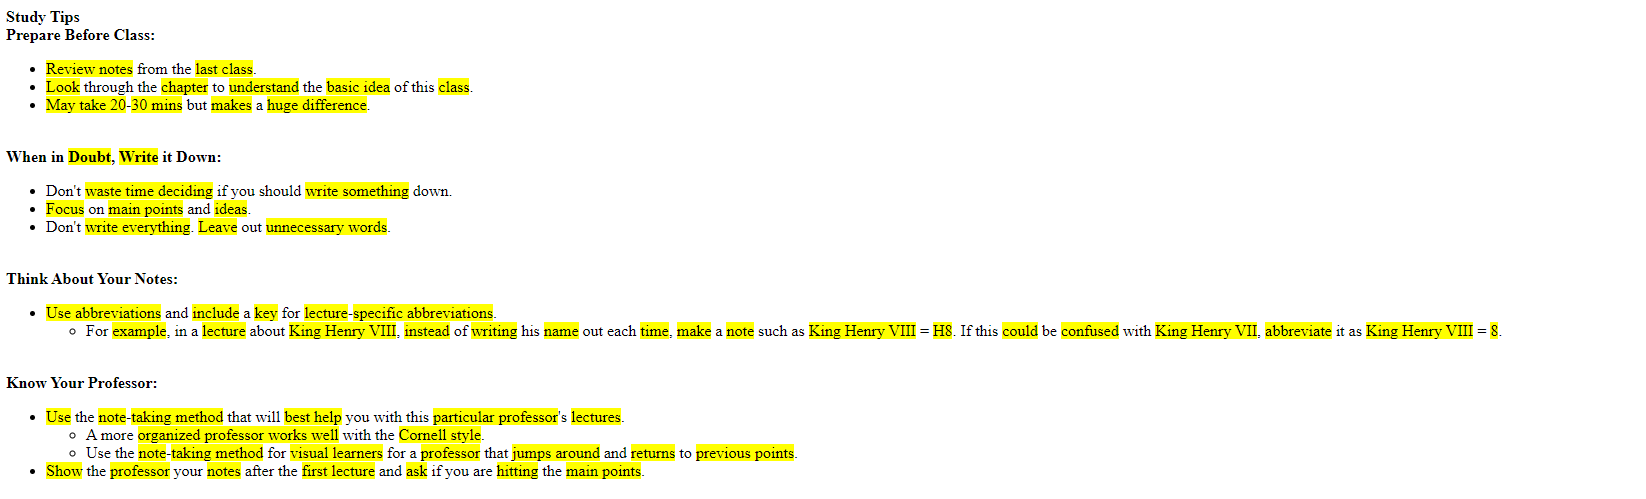

In [ ]:
!pip install weasyprint

  Using cached weasyprint-62.0-py3-none-any.whl (289 kB)
  Using cached pydyf-0.10.0-py3-none-any.whl (8.1 kB)
  Using cached cssselect2-0.7.0-py3-none-any.whl (15 kB)
  Using cached pyphen-0.15.0-py3-none-any.whl (2.1 MB)
  Using cached zopfli-0.2.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (848 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.1 MB/s eta 0:00:00


# **PRINT TO PDF**



In [ ]:
import weasyprint
pdf = weasyprint.HTML('output.html').write_pdf()
open('output.pdf', 'wb').write(pdf)

13675

output.pdf

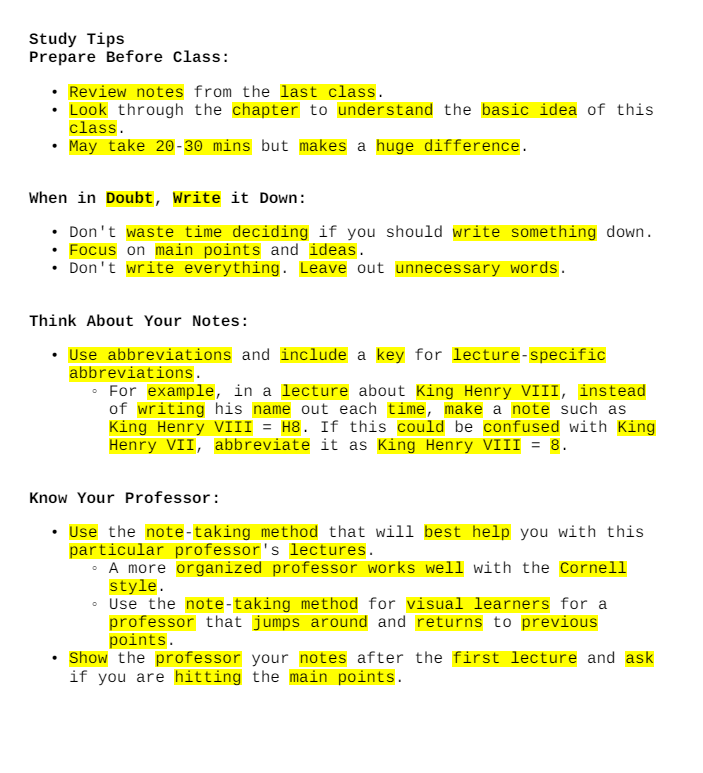```

